In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# EMILIO

# Overview

### Introduction
Fieldtriplife.com is an entertainment business managed by Art & Craft that promotes Toronto’s downtown music and arts festival. Visitors of the website can check upcoming music & arts festivals and their artists, watch music videos, and buy event tickets & merchandise. The website is controlled and maintained by Alibi Entertainment, Inc.

### Purpose
The ultimate goal of this experiment is to give merchandise recommendation given the specific "transformed" features.

### Flow of Analysis <br>
<img src = 'https://drive.google.com/uc?id=1NyPBncONbo5-Hq5XMW1KBD-KVQeCDAav'>

In [ ]:
# MOHAMMAD

# Data collection <br>
<img src = 'https://drive.google.com/uc?id=1UFzn9gGYeK0kGw1WF3TPyGVLLhOr_blX'>

# Import Dataset

In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification

# Data processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

from sklearn.metrics import plot_confusion_matrix

In [ ]:
# import dataset
# "\Trillabit\Dataset\data_marketing_WITHOUT ERROR.csv"
df = pd.read_csv('/content/drive/MyDrive/data_marketing_WITHOUT ERROR.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,13,15,18,19,20,21,22,23,24,25,28,30,31,32,34,35,39,41,42,44,45,47,49,50,55,57,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
shop = pd.read_csv('/content/drive/MyDrive/shoppingcart.csv')

In [ ]:
df.shape, shop.shape

((274930, 59), (34, 45))

In [ ]:
df.head(3)

,anonymousId,channel,ip,LibraryName,LibraryVersion,Locale,Path,Referrer,REFERER_DOMAIN,PageSearch,...,PptyUrl,VideoId,ReceivedAt,SentAt,Timestamp,Type,UserId,Version,properties_video_session_id,properties_page_type
0,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,27-07-21 8:18,27-07-21 8:18,27-07-21 8:18,track,NaN,2,NaN,NaN
1,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,27-07-21 8:18,27-07-21 8:18,27-07-21 8:18,track,NaN,2,NaN,NaN
2,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,27-07-21 8:18,27-07-21 8:18,27-07-21 8:18,track,NaN,2,NaN,NaN


In [ ]:
shop.head(3)

,Video_url,Price,CartItemId,CreatedDate,cartItemHistory_updatedAt,UserId,ProductId,cartItemHistory_brandId,cartItemHistory_variantId,ChangeType,...,Video_updatedAt,Video_brandId,Video_createdBy,VideoTitle,VideoDescription,VideoShortDescription,VideoIsAvailable,VideoIsFree,Video_thumbnailUrl,VideoType
0,NaN,NaN,cknrfwqi800190wllbzoxqpyh,21-04-21 8:36,21-04-21 8:36,c2a0c690-a297-11eb-b061-358d1dae15d4,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzY2Mzk5ODQ0MTA4MDE=,ftl,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0VmFyaWFudC8zOTU2Nj...,ADD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,cknrfxipm00360wml6q1dwuki,21-04-21 8:37,21-04-21 8:37,c2a0c690-a297-11eb-b061-358d1dae15d4,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzY2Mzk4MzU4NzM0NTc=,ftl,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0VmFyaWFudC8zOTU2NT...,ADD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,cknrhxz90020012mknly0k7kz,21-04-21 9:33,21-04-21 9:33,e8692300-a2a5-11eb-bbed-dd5afbc99dd8,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzY2NDQ1MjI5MDk4NzM=,ftl,Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0VmFyaWFudC8zOTU4MD...,ADD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274930 entries, 0 to 274929
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   anonymousId                  274930 non-null  object 
 1   channel                      274930 non-null  object 
 2   ip                           274930 non-null  object 
 3   LibraryName                  274930 non-null  object 
 4   LibraryVersion               274930 non-null  object 
 5   Locale                       274930 non-null  object 
 6   Path                         180342 non-null  object 
 7   Referrer                     175778 non-null  object 
 8   REFERER_DOMAIN               175778 non-null  object 
 9   PageSearch                   448 non-null     object 
 10  PageTitle                    273227 non-null  object 
 11  Url                          274930 non-null  object 
 12  UserAgent                    0 non-null       float64
 13 

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Video_url                  0 non-null      float64
 1   Price                      0 non-null      float64
 2   CartItemId                 34 non-null     object 
 3   CreatedDate                34 non-null     object 
 4   cartItemHistory_updatedAt  34 non-null     object 
 5   UserId                     34 non-null     object 
 6   ProductId                  34 non-null     object 
 7   cartItemHistory_brandId    34 non-null     object 
 8   cartItemHistory_variantId  34 non-null     object 
 9   ChangeType                 34 non-null     object 
 10  Quantity                   34 non-null     int64  
 11  VideoId                    0 non-null      float64
 12  Product_id                 34 non-null     object 
 13  Product_createdAt          34 non-null     object 
 

In [ ]:
# filter track observations since we wanter to analyze data labelled as track
df = df[(df.Type == "track")] # filter "track" under type variable

In [ ]:
df.shape # rows reduced from 275k to 99k

(99563, 59)

# Exploratory Data Analysis (Original Dataset)

In [ ]:
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
#checking of missing values for the webdata 

df.isna().sum() #significant missing values are detected in the original dataset. 

anonymousId                        0
channel                            0
ip                                 0
LibraryName                        0
LibraryVersion                     0
Locale                             0
Path                           11998
Referrer                       48342
REFERER_DOMAIN                 48342
PageSearch                     99490
PageTitle                        102
Url                                0
UserAgent                      99563
event                              0
messageId                          0
name                           95529
originalTimestamp                  0
projectId                          0
Product                        75595
Video                          62622
Brand                          96223
BrandId                           28
Category                       96833
AssetId                        70970
DisplayType                    98132
eCommerceType                  95529
ElapsedTimeSec                 92261
E

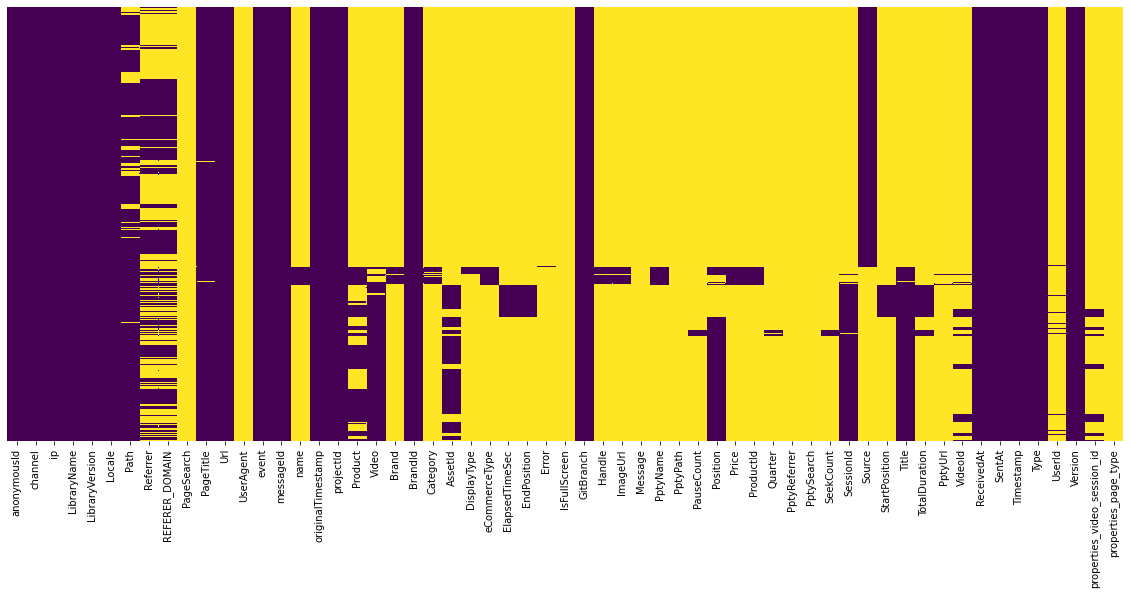

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #visualizing the patterns of the missing values, it appears to be Missing-Not-At-Random 

In [ ]:
#checking of missing values for the shop data

shop.isna().sum() #significant missing values are detected in the original dataset. 

Video_url                    34
Price                        34
CartItemId                    0
CreatedDate                   0
cartItemHistory_updatedAt     0
UserId                        0
ProductId                     0
cartItemHistory_brandId       0
cartItemHistory_variantId     0
ChangeType                    0
Quantity                      0
VideoId                      34
Product_id                    0
Product_createdAt             0
Product_updatedAt             0
AlternateProductId            0
ProductTitle                  0
ProductHandle                 0
ProductType                  17
ProductVendor                 0
Product_originalSrcImage      0
Product_target_url           34
Product_video_id             34
AvailableForSale              0
Variant_id                    0
Variant_createdAt             0
Variant_updatedAt             0
Variant_alternateId           0
Variant_productId             0
Variant_title                 0
Variant_originalSrcImage      0
Variant_

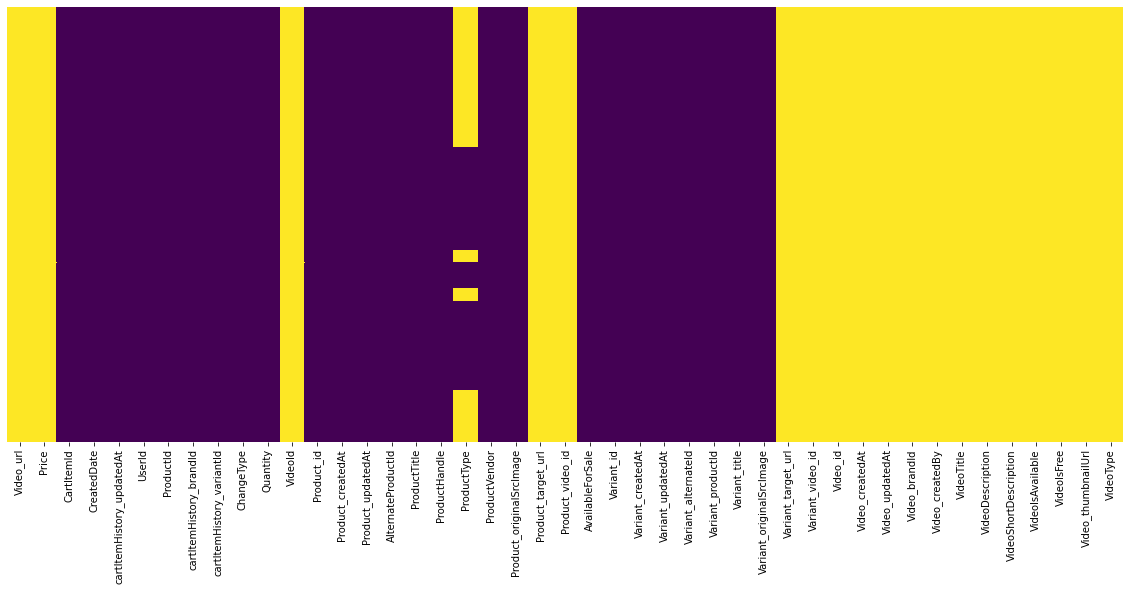

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(shop.isnull(),yticklabels=False,cbar=False,cmap='viridis') #visualizing the patterns of the missing values, it appears to be Missing-Not-At-Random 

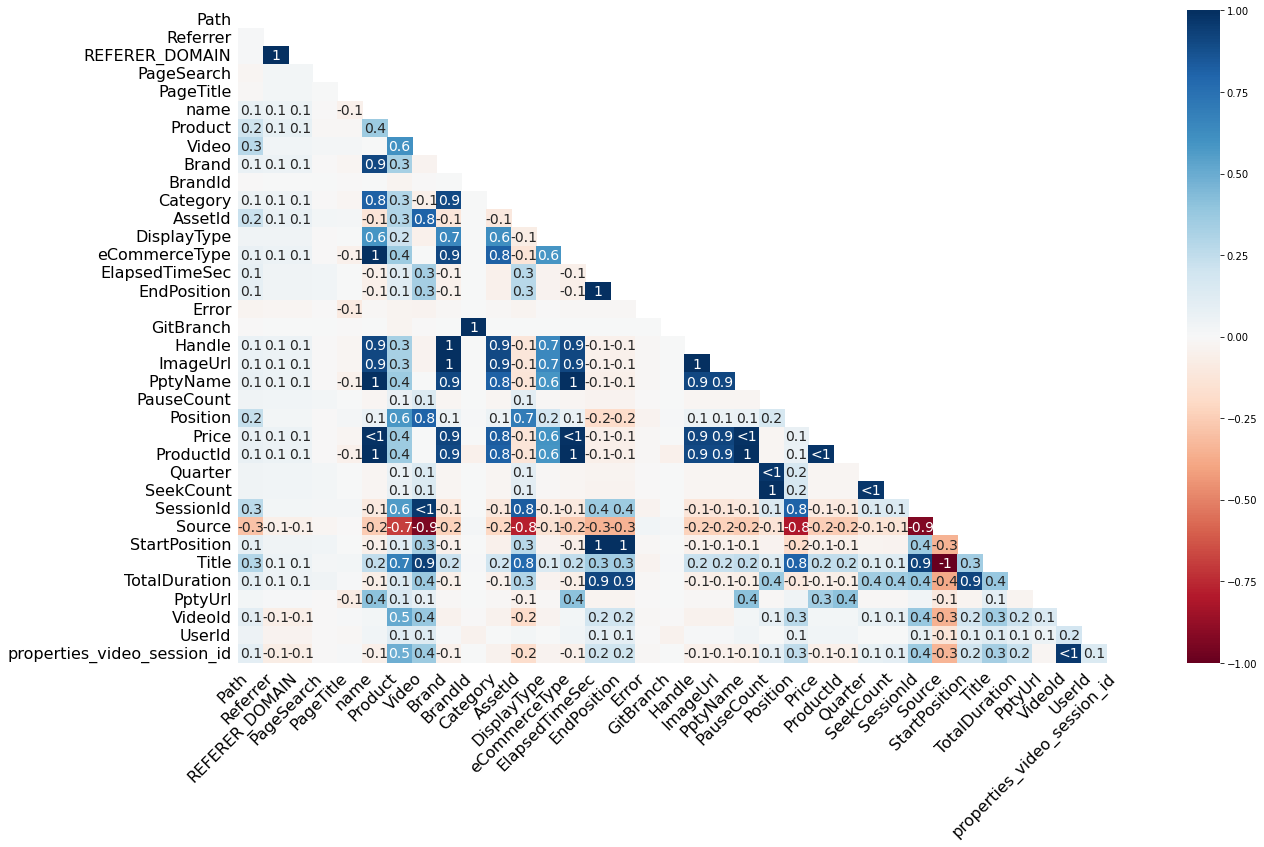

In [ ]:
msno.heatmap(df) #correlation of the webdata 


##Highly correlated variables:
#Number of clicks, error count and buy frequency, video, average page per session
#Privacy and terms and conditions pages
#Blank,  error count and buy frequency, video, average page per session
#Search engine, error count and product


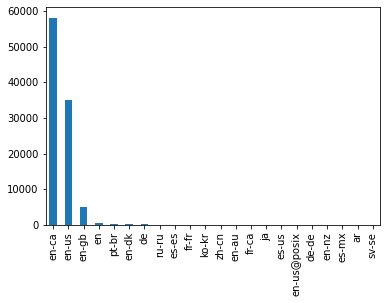

In [ ]:
fig, ax = plt.subplots()
df['Locale'].value_counts().plot(ax=ax, kind='bar') 

In [ ]:
df['Path'].value_counts()

/video/1619086                                               21284
/video/700827358                                             11208
/video/1508170                                                8661
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc0OTcyODY3NTY=     7349
/video/683523379                                              4747
                                                             ...  
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc1MTIyMjg5NjQ=        1
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc2ODM4Njc3NDg=        1
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc1MTEwMTY1NDg=        1
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc2NjMzNTQ5ODA=        1
/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc1NzQ5NDY5MTY=        1
Name: Path, Length: 97, dtype: int64

In [ ]:
df['Referrer'].value_counts() #source of traffic was mostly referred by google and instagram

https://www.google.com                                                                     22509
https://l.instagram.com/                                                                    5966
https://www.google.com/                                                                     5729
https://www.google.ca                                                                       2453
https://www.google.ca/                                                                      1458
                                                                                           ...  
https://www.fieldtriplife.com/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc2NDE2OTUzMzI=/        1
https://www.fieldtriplife.com/db-admin/                                                        1
https://www.fieldtriplife.com/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzE1MTc2NDEwNzI3NDA=         1
https://www.fieldtriplife.com/product/Z2lkOi8vc2hvcGlmeS9Qcm9kdWN0LzY1NTkwMTUzMDUzNTA=         1
https://duckduckgo.com        

In [ ]:
# JOMBEE

# Merge shopping and Web Data

In [ ]:
#to check identical column names between dataframes 
ident_colmn = np.intersect1d(df.columns,shop.columns)
print("Common columns are: ",ident_colmn)

Common columns are:  ['Price' 'ProductId' 'UserId' 'VideoId']


In [ ]:
#merge data by joining left shop data with web data by UserId. Rows in the left with no corresponding userid in the right will return NAN join values.
df_combined = pd.merge(df, shop, on="UserId", how="left")
df_combined.head()

,anonymousId,channel,ip,LibraryName,LibraryVersion,Locale,Path,Referrer,REFERER_DOMAIN,PageSearch,...,Video_updatedAt,Video_brandId,Video_createdBy,VideoTitle,VideoDescription,VideoShortDescription,VideoIsAvailable,VideoIsFree,Video_thumbnailUrl,VideoType
0,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f589d099-9b64-40a2-b348-e571243ada60,client,174.92.137.68,analytics.js,next-1.28.1,en-us,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combined.tail()

,anonymousId,channel,ip,LibraryName,LibraryVersion,Locale,Path,Referrer,REFERER_DOMAIN,PageSearch,...,Video_updatedAt,Video_brandId,Video_createdBy,VideoTitle,VideoDescription,VideoShortDescription,VideoIsAvailable,VideoIsFree,Video_thumbnailUrl,VideoType
107189,4fa1c472-2a7d-404e-a1db-40236a9a04cf,client,72.142.15.10,analytics.js,next-1.37.0,en-us,/video/1507924,https://www.google.com,www.google.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107190,4fa1c472-2a7d-404e-a1db-40236a9a04cf,client,72.142.15.10,analytics.js,next-1.37.0,en-us,/video/1507924,https://www.google.com,www.google.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107191,4fa1c472-2a7d-404e-a1db-40236a9a04cf,client,72.142.15.10,analytics.js,next-1.37.0,en-us,/video/1507924,https://www.google.com,www.google.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107192,4fa1c472-2a7d-404e-a1db-40236a9a04cf,client,72.142.15.10,analytics.js,next-1.37.0,en-us,/video/1507924,https://www.google.com,www.google.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107193,4fa1c472-2a7d-404e-a1db-40236a9a04cf,client,72.142.15.10,analytics.js,next-1.37.0,en-us,/video/1507924,https://www.google.com,www.google.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combined.shape # check dimension after merging

(107194, 103)

In [ ]:
list(df_combined.columns.values) # to show dataframe all column names (103 columns)

['anonymousId',
 'channel',
 'ip',
 'LibraryName',
 'LibraryVersion',
 'Locale',
 'Path',
 'Referrer',
 'REFERER_DOMAIN',
 'PageSearch',
 'PageTitle',
 'Url',
 'UserAgent',
 'event',
 'messageId',
 'name',
 'originalTimestamp',
 'projectId',
 'Product',
 'Video',
 'Brand',
 'BrandId',
 'Category',
 'AssetId',
 'DisplayType',
 'eCommerceType',
 'ElapsedTimeSec',
 'EndPosition',
 'Error',
 'IsFullScreen',
 'GitBranch',
 'Handle',
 'ImageUrl',
 'Message',
 'PptyName',
 'PptyPath',
 'PauseCount',
 'Position',
 'Price_x',
 'ProductId_x',
 'Quarter',
 'PptyReferrer',
 'PptySearch',
 'SeekCount',
 'SessionId',
 'Source',
 'StartPosition',
 'Title',
 'TotalDuration',
 'PptyUrl',
 'VideoId_x',
 'ReceivedAt',
 'SentAt',
 'Timestamp',
 'Type',
 'UserId',
 'Version',
 'properties_video_session_id',
 'properties_page_type',
 'Video_url',
 'Price_y',
 'CartItemId',
 'CreatedDate',
 'cartItemHistory_updatedAt',
 'ProductId_y',
 'cartItemHistory_brandId',
 'cartItemHistory_variantId',
 'ChangeType',
 

In [ ]:
#function check column names with duplicate rows across dataset
def getDuplicateColumns(df):
  duplicateClmnNames = set() #open string where the result will be added
  for x in range (df.shape[1]): #to get the range - total count of columns in the dataframe (df.shape shows count)
    col = df.iloc[:, x] # locate all the rows in a column (x) and keep it in "col"
    for y in range (x+1, df.shape[1]): #get the range in every other column
      otherCol = df.iloc[:, y] # locate the all other rows in a column and keep it in 'otherCol'
      if col.equals(otherCol): #then if col is equal to other column,then
        duplicateClmnNames.add(df.columns.values[y]) #add it to the list
  return list(duplicateClmnNames) #when the function is called, it will return list of duplicate columns like below


In [ ]:
 #get list of duplicate column names  = duplicate because of NAs
duplicateClmnNames = getDuplicateColumns(df_combined)
print ("Duplicate Columns are the following")
for col in duplicateClmnNames:
  print('Column name : ', col)

Duplicate Columns are the following
Column name :  Video_url
Column name :  VideoIsAvailable
Column name :  PptyName
Column name :  Variant_createdAt
Column name :  IsFullScreen
Column name :  Video_brandId
Column name :  SentAt
Column name :  Video_createdAt
Column name :  Variant_productId
Column name :  Video_thumbnailUrl
Column name :  Price_y
Column name :  PptyReferrer
Column name :  VideoTitle
Column name :  Variant_target_url
Column name :  Video_createdBy
Column name :  Variant_video_id
Column name :  properties_page_type
Column name :  VideoType
Column name :  Variant_id
Column name :  VideoShortDescription
Column name :  VideoDescription
Column name :  cartItemHistory_updatedAt
Column name :  Message
Column name :  VideoIsFree
Column name :  Timestamp
Column name :  VideoId_y
Column name :  Product_video_id
Column name :  Video_updatedAt
Column name :  Product_target_url
Column name :  Video_id
Column name :  Product_id
Column name :  PptySearch


In [ ]:
# 32 columns with identical values

In [ ]:
#count of duplicates in userId 
df_combined.pivot_table(columns=["UserId"],aggfunc='size') 

UserId
2c96cff2-7b71-466e-ac76-c29e8bc82092       3
9e7fd432-8689-495d-ba3e-4bf67cecffc4    1053
a61d9f29-4c39-4900-b294-12aa36a96329    7974
a8844551-b640-4b58-aa4e-3ff2f4592245     381
b8ff4df6-c023-4d11-a738-732d01069a55      21
dtype: int64

In [ ]:
## df_combined.to_csv('df_combined.csv') # export to csv

# Data Transformation

**Metrics**
1. Video watched
2. Bounce rate
3. Number of sessions (1 session = 30 mins)
4. Referrer (prior websites)
5. Item purchased

*per anonymousId observations*


## 1. Video watched

In [ ]:
# EMILIO

In [ ]:
video = df_combined[['anonymousId', 'Video']].copy() # create new dataset with relevant features

In [ ]:
video

,anonymousId,Video
0,f589d099-9b64-40a2-b348-e571243ada60,NaN
1,f589d099-9b64-40a2-b348-e571243ada60,NaN
2,f589d099-9b64-40a2-b348-e571243ada60,NaN
3,f589d099-9b64-40a2-b348-e571243ada60,NaN
4,f589d099-9b64-40a2-b348-e571243ada60,NaN
...,...,...
107189,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT
107190,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT
107191,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT
107192,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT


In [ ]:
df_combined['Video'].nunique(dropna = False) # number of unique items

25

In [ ]:
df_combined['Video'].unique() # list unique values NA not included

array([nan, 'PIERRE KWENDERS', 'BROKEN SOCIAL SCENE', 'GEORGIA HARMER',
       'no-video-in-view', 'REUBEN and the DARK', 'FIELD TRIP RETURNS',
       'CHARLIE HOUSTON', 'JASON COLLETT', 'Field Trip',
       'Broken Social Scene - You Forgot It In People',
       'Broken Social Scene - Mystery Box CD + T-Shirt',
       'FIELD TRIP ORIGINS',
       'Broken Social Scene - Forgiveness Rock Record CD',
       'Broken Social Scene - Unisex Lightblast T-Shirt',
       'Broken Social Scene - Sweater', 'FIELD TRIP 2022', 'OMBIIGIZI',
       'FIELD TRIP 2014', 'FIELD TRIP 2015', 'Charlie Houston - Things',
       'Field Trip - Skyline Tank', 'A Short Film about Field Trip.mp4',
       'The Return of a made-in-Toronto Music Festival', 'DAN MANGAN'],
      dtype=object)

In [ ]:
video_hat = pd.get_dummies(df_combined['Video']) # dummification of categorical video feature
video_hat

,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,DAN MANGAN,...,FIELD TRIP RETURNS,Field Trip,Field Trip - Skyline Tank,GEORGIA HARMER,JASON COLLETT,OMBIIGIZI,PIERRE KWENDERS,REUBEN and the DARK,The Return of a made-in-Toronto Music Festival,no-video-in-view
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
video = pd.concat([video, video_hat], axis = 1) # merge 2 dataframe by axis number
video

,anonymousId,Video,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,...,FIELD TRIP RETURNS,Field Trip,Field Trip - Skyline Tank,GEORGIA HARMER,JASON COLLETT,OMBIIGIZI,PIERRE KWENDERS,REUBEN and the DARK,The Return of a made-in-Toronto Music Festival,no-video-in-view
0,f589d099-9b64-40a2-b348-e571243ada60,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,f589d099-9b64-40a2-b348-e571243ada60,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,f589d099-9b64-40a2-b348-e571243ada60,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f589d099-9b64-40a2-b348-e571243ada60,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,f589d099-9b64-40a2-b348-e571243ada60,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107189,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107190,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107191,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107192,4fa1c472-2a7d-404e-a1db-40236a9a04cf,JASON COLLETT,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
video.drop(['Video'], axis = 1, inplace = True) # drop Video column
video

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,FIELD TRIP RETURNS,Field Trip,Field Trip - Skyline Tank,GEORGIA HARMER,JASON COLLETT,OMBIIGIZI,PIERRE KWENDERS,REUBEN and the DARK,The Return of a made-in-Toronto Music Festival,no-video-in-view
0,f589d099-9b64-40a2-b348-e571243ada60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,f589d099-9b64-40a2-b348-e571243ada60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,f589d099-9b64-40a2-b348-e571243ada60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f589d099-9b64-40a2-b348-e571243ada60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,f589d099-9b64-40a2-b348-e571243ada60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107189,4fa1c472-2a7d-404e-a1db-40236a9a04cf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107190,4fa1c472-2a7d-404e-a1db-40236a9a04cf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107191,4fa1c472-2a7d-404e-a1db-40236a9a04cf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107192,4fa1c472-2a7d-404e-a1db-40236a9a04cf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107194 entries, 0 to 107193
Data columns (total 25 columns):
 #   Column                                            Non-Null Count   Dtype 
---  ------                                            --------------   ----- 
 0   anonymousId                                       107194 non-null  object
 1   A Short Film about Field Trip.mp4                 107194 non-null  uint8 
 2   BROKEN SOCIAL SCENE                               107194 non-null  uint8 
 3   Broken Social Scene - Forgiveness Rock Record CD  107194 non-null  uint8 
 4   Broken Social Scene - Mystery Box CD + T-Shirt    107194 non-null  uint8 
 5   Broken Social Scene - Sweater                     107194 non-null  uint8 
 6   Broken Social Scene - Unisex Lightblast T-Shirt   107194 non-null  uint8 
 7   Broken Social Scene - You Forgot It In People     107194 non-null  uint8 
 8   CHARLIE HOUSTON                                   107194 non-null  uint8 
 9   Charlie Houston

In [ ]:
video = pd.DataFrame(video.groupby(['anonymousId'], as_index=False).sum()) # group by anonymousId and get total video watched per video
video #to attach to df1

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,FIELD TRIP RETURNS,Field Trip,Field Trip - Skyline Tank,GEORGIA HARMER,JASON COLLETT,OMBIIGIZI,PIERRE KWENDERS,REUBEN and the DARK,The Return of a made-in-Toronto Music Festival,no-video-in-view
0,0025fb46-562d-4356-bd7f-8d676d068768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00593f96-1168-44c8-857d-7e1c496979bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0099e8f2-c8ac-49dc-800d-910026488ac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,4.0
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0148af27-acb6-46b7-8844-27939dc26646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,fe95d8de-c3d7-4dbe-94cb-9c3a2ebeea38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1541,fea908e1-857c-4e79-ac20-838b50084e1b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0
1542,ff56446f-b7dd-4fb8-af77-0c56345f76f7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1543,ffbbb7ea-3f9b-4d07-b7aa-f19137b87f7c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   anonymousId                                       1545 non-null   object 
 1   A Short Film about Field Trip.mp4                 1545 non-null   float64
 2   BROKEN SOCIAL SCENE                               1545 non-null   float64
 3   Broken Social Scene - Forgiveness Rock Record CD  1545 non-null   float64
 4   Broken Social Scene - Mystery Box CD + T-Shirt    1545 non-null   float64
 5   Broken Social Scene - Sweater                     1545 non-null   float64
 6   Broken Social Scene - Unisex Lightblast T-Shirt   1545 non-null   float64
 7   Broken Social Scene - You Forgot It In People     1545 non-null   float64
 8   CHARLIE HOUSTON                                   1545 non-null   float64
 9   Charlie Houston - T

In [ ]:
video.sum() # checking how many views per video

anonymousId                                         0025fb46-562d-4356-bd7f-8d676d06876800593f96-1...
A Short Film about Field Trip.mp4                                                                54.0
BROKEN SOCIAL SCENE                                                                            2716.0
Broken Social Scene - Forgiveness Rock Record CD                                                  3.0
Broken Social Scene - Mystery Box CD + T-Shirt                                                    2.0
Broken Social Scene - Sweater                                                                     2.0
Broken Social Scene - Unisex Lightblast T-Shirt                                                   4.0
Broken Social Scene - You Forgot It In People                                                     2.0
CHARLIE HOUSTON                                                                                4352.0
Charlie Houston - Things                                                          

## 2. Bounce rate

In [ ]:
# DONNA

In [ ]:
#subset needed columns
bounce_df = df_combined[['anonymousId','originalTimestamp','Url']]
bounce_df 

,anonymousId,originalTimestamp,Url
0,f589d099-9b64-40a2-b348-e571243ada60,27-07-21 8:18,https://www.fieldtriplife.com
1,f589d099-9b64-40a2-b348-e571243ada60,27-07-21 8:18,https://www.fieldtriplife.com
2,f589d099-9b64-40a2-b348-e571243ada60,27-07-21 8:18,https://www.fieldtriplife.com
3,f589d099-9b64-40a2-b348-e571243ada60,27-07-21 8:18,https://www.fieldtriplife.com
4,f589d099-9b64-40a2-b348-e571243ada60,27-07-21 8:18,https://www.fieldtriplife.com
...,...,...,...
107189,4fa1c472-2a7d-404e-a1db-40236a9a04cf,24-05-22 10:26,https://www.fieldtriplife.com/video/1507924
107190,4fa1c472-2a7d-404e-a1db-40236a9a04cf,24-05-22 10:27,https://www.fieldtriplife.com/video/1507924
107191,4fa1c472-2a7d-404e-a1db-40236a9a04cf,24-05-22 10:27,https://www.fieldtriplife.com/video/1507924
107192,4fa1c472-2a7d-404e-a1db-40236a9a04cf,24-05-22 10:27,https://www.fieldtriplife.com/video/1507924


In [ ]:
#remove duplicate rows by keeping the first duplicate row
bounce_df2= bounce_df.drop_duplicates(keep='first')
bounce_df2.shape

(6701, 3)

In [ ]:
#using a helper function that group consecutive timestamps as long as they are within 30min threshold of the first value
bounce_df2['originalTimestamp'] = pd.to_datetime(bounce_df2['originalTimestamp']) #convert to datetime type
def get_session(s, thresh='30min'):
    out = [1]+[0]*(len(s)-1)
    ref = s.iloc[0]
    for i, val in enumerate(s[1:]):
        if (val-ref) > pd.Timedelta(thresh):
            out[i+1] = 1
            ref = val
    return pd.Series(out, index=s.index)

bounce_df2['NewSession'] = bounce_df2.groupby('anonymousId')['originalTimestamp'].apply(get_session)
bounce_df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,anonymousId,originalTimestamp,Url,NewSession
0,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,https://www.fieldtriplife.com,1
6,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,https://www.fieldtriplife.com/app,0
12,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:31:00,https://www.fieldtriplife.com,0
18,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:32:00,https://www.fieldtriplife.com/product-collecti...,0
21,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:32:00,https://www.fieldtriplife.com,0


In [ ]:
#filter anonymous id with session greater than 0
df_sessionise = bounce_df2[bounce_df2['NewSession'] > 0]
df_sessionise

,anonymousId,originalTimestamp,Url,NewSession
0,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,https://www.fieldtriplife.com,1
24,f6f1b4b6-e0f2-40f6-8a52-f4b8968487f3,2021-07-27 09:03:00,https://www.fieldtriplife.com/product-collecti...,1
36,2d5fe7ca-d572-4fee-b8c6-22f9eb8ce18d,2021-07-27 09:57:00,https://www.fieldtriplife.com,1
44,f01eb503-5488-4c1a-a63d-c0f81de01784,2021-07-27 10:34:00,https://www.fieldtriplife.com/video/1507924,1
45,c913aaaa-b5aa-4584-946f-d53f6be54ce0,2021-07-27 10:43:00,https://www.fieldtriplife.com,1
...,...,...,...,...
103062,8134969f-1db9-4edb-b725-7be804d3fc61,2022-03-22 10:03:00,https://www.fieldtriplife.com/video/1507924,1
103413,bb25cda9-f6cf-487b-b28c-e6d1b5193f02,2022-03-24 13:08:00,https://www.fieldtriplife.com/video/683523379,1
104412,b8378a98-129e-42d7-8ff9-15a5c588353a,2022-04-22 12:54:00,https://www.fieldtriplife.com/video/1619086,1
104501,f37104c9-b8ba-4bee-94b1-29e5cfd066ff,2022-04-25 14:52:00,https://www.fieldtriplife.com/video/700827358,1


In [ ]:
#compute total number of sessions per anonymous id
total_sessions = df_sessionise.groupby('anonymousId').agg({'NewSession':'sum'}).reset_index().rename(columns ={'NewSession': 'TotalSessions'})
total_sessions

,anonymousId,TotalSessions
0,0025fb46-562d-4356-bd7f-8d676d068768,1
1,00593f96-1168-44c8-857d-7e1c496979bb,1
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1
4,0148af27-acb6-46b7-8844-27939dc26646,1
...,...,...
1540,fe95d8de-c3d7-4dbe-94cb-9c3a2ebeea38,3
1541,fea908e1-857c-4e79-ac20-838b50084e1b,1
1542,ff56446f-b7dd-4fb8-af77-0c56345f76f7,1
1543,ffbbb7ea-3f9b-4d07-b7aa-f19137b87f7c,1


In [ ]:
#number of single session per anonymous id 
single_session = df_sessionise.groupby(['anonymousId','NewSession']).agg({'Url':'count'}).reset_index().rename(columns ={'Url': 'SingleSession'})
single_session

,anonymousId,NewSession,SingleSession
0,0025fb46-562d-4356-bd7f-8d676d068768,1,1
1,00593f96-1168-44c8-857d-7e1c496979bb,1,1
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1,1
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1,1
4,0148af27-acb6-46b7-8844-27939dc26646,1,1
...,...,...,...
1540,fe95d8de-c3d7-4dbe-94cb-9c3a2ebeea38,1,3
1541,fea908e1-857c-4e79-ac20-838b50084e1b,1,1
1542,ff56446f-b7dd-4fb8-af77-0c56345f76f7,1,1
1543,ffbbb7ea-3f9b-4d07-b7aa-f19137b87f7c,1,1


In [ ]:
#merge single and total count of sessions according to unique anonymous id 
bounce_df5 = pd.merge(single_session , total_sessions, on= 'anonymousId', how = 'inner')
bounce_df5

,anonymousId,NewSession,SingleSession,TotalSessions
0,0025fb46-562d-4356-bd7f-8d676d068768,1,1,1
1,00593f96-1168-44c8-857d-7e1c496979bb,1,1,1
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1,1,1
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1,1,1
4,0148af27-acb6-46b7-8844-27939dc26646,1,1,1
...,...,...,...,...
1540,fe95d8de-c3d7-4dbe-94cb-9c3a2ebeea38,1,3,3
1541,fea908e1-857c-4e79-ac20-838b50084e1b,1,1,1
1542,ff56446f-b7dd-4fb8-af77-0c56345f76f7,1,1,1
1543,ffbbb7ea-3f9b-4d07-b7aa-f19137b87f7c,1,1,1


In [ ]:
#compute for the bounce rate which is equivalent to single session over total sessions
bounce_df5 = bounce_df5.assign(Bounce_Rate=lambda x: x.NewSession / bounce_df5['TotalSessions'])
bounce_df5

,anonymousId,NewSession,SingleSession,TotalSessions,Bounce_Rate
0,0025fb46-562d-4356-bd7f-8d676d068768,1,1,1,1.000000
1,00593f96-1168-44c8-857d-7e1c496979bb,1,1,1,1.000000
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1,1,1,1.000000
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1,1,1,1.000000
4,0148af27-acb6-46b7-8844-27939dc26646,1,1,1,1.000000
...,...,...,...,...,...
1540,fe95d8de-c3d7-4dbe-94cb-9c3a2ebeea38,1,3,3,0.333333
1541,fea908e1-857c-4e79-ac20-838b50084e1b,1,1,1,1.000000
1542,ff56446f-b7dd-4fb8-af77-0c56345f76f7,1,1,1,1.000000
1543,ffbbb7ea-3f9b-4d07-b7aa-f19137b87f7c,1,1,1,1.000000


In [ ]:
bounce_df6 = bounce_df5[['anonymousId', 'Bounce_Rate']]
bounce_df6.head()
#bounce_df5['Bounce_Rate'] to attach to df1

,anonymousId,Bounce_Rate
0,0025fb46-562d-4356-bd7f-8d676d068768,1.0
1,00593f96-1168-44c8-857d-7e1c496979bb,1.0
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1.0
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1.0
4,0148af27-acb6-46b7-8844-27939dc26646,1.0


## 3. Number of session

In [ ]:
# DONNA

In [ ]:
#prepare the dataset to sessionize
df_sess = df_combined[["anonymousId", "originalTimestamp"]]
df_sess["anonymousId"] = df_sess["anonymousId"].astype('category')
df_sess["originalTimestamp"] = pd.to_datetime(df_sess["originalTimestamp"] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,anonymousId,originalTimestamp
0,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00
1,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00
2,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00
3,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00
4,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00


In [ ]:
df_sess['Session_Number'] = pd.DataFrame(df_sess.groupby('anonymousId')['originalTimestamp'].apply(get_session))
df_sess.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,anonymousId,originalTimestamp,Session_Number
0,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,1
1,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,0
2,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,0
3,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,0
4,f589d099-9b64-40a2-b348-e571243ada60,2021-07-27 08:18:00,0


In [ ]:
df_NumSession = pd.DataFrame(df_sess.groupby(['anonymousId'],as_index=False)['Session_Number'].sum())
df_NumSession.head()

#df_NumSession['Session'] to attach to df1

,anonymousId,Session_Number
0,0025fb46-562d-4356-bd7f-8d676d068768,1
1,00593f96-1168-44c8-857d-7e1c496979bb,1
2,0099e8f2-c8ac-49dc-800d-910026488ac2,1
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,1
4,0148af27-acb6-46b7-8844-27939dc26646,1


In [ ]:
df_NumSession.shape


(1545, 2)

## 4. Referrer

In [ ]:
# STEVEN

In [ ]:
#Creating a subset of needed variables from original data
dfreferrer = df[['anonymousId','Referrer']]
dfreferrer = pd.DataFrame(dfreferrer)
dfreferrer

,anonymousId,Referrer
0,f589d099-9b64-40a2-b348-e571243ada60,NaN
1,f589d099-9b64-40a2-b348-e571243ada60,NaN
2,f589d099-9b64-40a2-b348-e571243ada60,NaN
3,f589d099-9b64-40a2-b348-e571243ada60,NaN
4,f589d099-9b64-40a2-b348-e571243ada60,NaN
...,...,...
99558,4fa1c472-2a7d-404e-a1db-40236a9a04cf,https://www.google.com
99559,4fa1c472-2a7d-404e-a1db-40236a9a04cf,https://www.google.com
99560,4fa1c472-2a7d-404e-a1db-40236a9a04cf,https://www.google.com
99561,4fa1c472-2a7d-404e-a1db-40236a9a04cf,https://www.google.com


In [ ]:
#Unique observations for referrer variable
dfreferrer['Referrer'].unique()

array([nan, 'https://www.google.com', 'https://www.google.com/',
       'android-app://com.google.android.gm/', 'https://www.google.ca',
       'https://t.co/WG4bMST3bQ?amp=1', 'https://www.bryanatkinson.com/',
       'https://www.fieldtriplife.com/', 'https://www.bing.com/',
       'https://destinationontario.com', 'https://www.google.ca/',
       'https://old.reddit.com/', 'https://reddit.com/',
       'https://www.reddit.com/',
       'https://out.reddit.com/t3_ox3y15?url=https%3A%2F%2Fwww.fieldtriplife.com%2F&token=AQAAJZ8JYRmlDDYGr8nhzsQtZ4yG4-jLLeXyUmfI1z_gXrXR26cw&app_name=ios&web_redirect=true',
       'https://out.reddit.com/t3_ox3y15?url=https%3A%2F%2Fwww.fieldtriplife.com%2F&token=AQAAMfgKYT63IZLW68lAGOr2FJN29_0MVzmG1TM07meCkjcnfHBV&app_name=ios',
       'https://www.fieldtriplife.com/app',
       'https://www.reddit.com/r/torontofestivals/',
       'https://destinationontario.com/', 'https://yandex.ru/',
       'https://out.reddit.com/t3_ox3y15?url=https%3A%2F%2Fwww.fieldtr

In [ ]:
# import dataset
dftesting = pd.read_csv('/content/drive/MyDrive/referrers_labelled.csv')
dftesting

,anonymousId,Referrer,Ref_Category
0,e28651e0-e99d-4eae-a6e2-6073667a3e1b,NaN,Blank
1,0cbdf10e-7cd0-41d0-a61a-ffb6d5f36aa2,NaN,Blank
2,b5e2185d-85d1-4b2a-a47a-2aa2be2669af,https://www.google.com,Search Engine
3,699e207d-41ce-42a4-9565-83125f4cd36c,https://www.google.ca,Search Engine
4,699e207d-41ce-42a4-9565-83125f4cd36c,https://www.google.ca,Search Engine
...,...,...,...
275590,3cce6125-ba7f-430a-be2d-992e1bad3e2a,https://l.instagram.com/,Social Media
275591,104d9548-e5c3-4b1f-85b6-754fd3d6103b,https://www.google.com/,Search Engine
275592,3cce6125-ba7f-430a-be2d-992e1bad3e2a,https://www.fieldtriplife.com/,Direct
275593,2e53507d-6306-4fc6-91db-6451dd42d533,NaN,Blank


In [ ]:
#Frequency of unique anonymousIds for each referrer category
finalreferrer = pd.crosstab(index=[dftesting['anonymousId']], columns=dftesting['Ref_Category'])
finalreferrer

Ref_Category,Affiliate Marketing,Blank,Direct,Search Engine,Social Media
anonymousId,,,,,
00016007-0665-49c6-97e1-7e775135dde4,0,0,0,1,0
00044bf9-4edf-4bb9-85aa-c88ab8778f98,0,0,0,0,2
000698dc-709d-488a-a050-b7932982c818,0,0,0,0,4
000ee17f-3ea6-4141-b4f7-bfe4fa2da130,0,2,0,0,0
000f1f9d-b864-494b-82d9-75715f5267c3,0,0,0,4,0
...,...,...,...,...,...
fff78ae2-54db-4f74-a467-ea3f9d212e59,0,0,0,0,2
fffabd8b-03d8-4245-82f2-4c987c2d0e10,0,0,0,0,4
fffb288a-b529-4875-8fd9-fe9fc51b08e8,0,0,0,6,0


In [ ]:
arr = dftesting['anonymousId'].unique()
arr

array(['e28651e0-e99d-4eae-a6e2-6073667a3e1b',
       '0cbdf10e-7cd0-41d0-a61a-ffb6d5f36aa2',
       'b5e2185d-85d1-4b2a-a47a-2aa2be2669af', ...,
       '23f09bd2-f80a-4367-a39e-3eb2b0175356',
       'b91406a4-d088-42ae-96bb-cf6cdf4359e1',
       'ff2b2ea6-e7a8-4ce0-a6d0-17d5960a2b39'], dtype=object)

In [ ]:
#To check if there are no duplicates
#Number of unique values for anonymousId
empty_list = [] 
count = 0

# travesing the array 
for element in arr:
    if(element not in empty_list):
        count += 1
        empty_list.append(element)

print("Count of unique anonymousId are:", count)

Count of unique anonymousId are: 27993


In [ ]:
df_referrer = pd.DataFrame(finalreferrer.groupby(['anonymousId'],as_index=False).sum())
df_referrer['anonymousId'] = finalreferrer.index
df_referrer.head()


Ref_Category,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,anonymousId
0,0,0,0,1,0,00016007-0665-49c6-97e1-7e775135dde4
1,0,0,0,0,2,00044bf9-4edf-4bb9-85aa-c88ab8778f98
2,0,0,0,0,4,000698dc-709d-488a-a050-b7932982c818
3,0,2,0,0,0,000ee17f-3ea6-4141-b4f7-bfe4fa2da130
4,0,0,0,4,0,000f1f9d-b864-494b-82d9-75715f5267c3


The number of unique anonymousId is identical to the number of rows, thus there are no duplicates for anonymousId.

## 5. Item purchased

In [ ]:
# STEVEN

In [ ]:
#get the needed variables
df_item = df_combined[['anonymousId','Product','event', 'ProductTitle']]
df_item.head()

,anonymousId,Product,event,ProductTitle
0,f589d099-9b64-40a2-b348-e571243ada60,NaN,Error Occurred,NaN
1,f589d099-9b64-40a2-b348-e571243ada60,NaN,Error Occurred,NaN
2,f589d099-9b64-40a2-b348-e571243ada60,NaN,Error Occurred,NaN
3,f589d099-9b64-40a2-b348-e571243ada60,NaN,Error Occurred,NaN
4,f589d099-9b64-40a2-b348-e571243ada60,NaN,Error Occurred,NaN


In [ ]:
df_combined['ProductTitle'].unique()

array([nan, 'Arts & Crafts Logo T-Shirt (Unisex) - Black',
       'Field Trip - Ear Defenders',
       'Pierre Kwenders - José Louis and the Paradox of Love',
       'Broken Social Scene - Sweater',
       'Field Trip - 2016 Lineup T-Shirt',
       'Jason Collett - Idols Of Exile',
       'Field Trip - Skyline Snapback Hat', 'Field Trip - Socks'],
      dtype=object)

In [ ]:
df_item.shape

(107194, 4)

In [ ]:
#filter the product under added to cart for webdata 
df_item2 = df_item[(df_item['event'] == 'Product Added to Cart') ]
df_item2

,anonymousId,Product,event,ProductTitle
60600,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60601,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60602,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60603,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Pierre Kwenders - José Louis and the Paradox o...
60604,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Pierre Kwenders - José Louis and the Paradox o...
60605,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Pierre Kwenders - José Louis and the Paradox o...
60606,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60607,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60608,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Field Trip - Ear Defenders
60609,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...,Product Added to Cart,Pierre Kwenders - José Louis and the Paradox o...


In [ ]:
#get the product under added to cart for webdata and producttitle for shoppingcart data
df_item2['Item_Purchased'] = df_item2['Product']

#filter only those with product item
df_item3 = df_item2[['anonymousId','Item_Purchased']]
df_item3.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(35, 2)

In [ ]:
#get the last prodcut per anonymousID
df_item3 = df_item3.groupby(['anonymousId'], as_index= False)['Item_Purchased'].last()
df_item3

,anonymousId,Item_Purchased
0,03137173-18df-4b28-bc6a-81c7e960d7f0,Field Trip - Skyline Snapback Hat
1,141ae20d-18b2-46f3-ac66-a62f02942b8d,Broken Social Scene - You Forgot It In People
2,7423b064-41e8-4359-919d-0dab740be773,Pierre Kwenders - José Louis and the Paradox o...
3,78a301cc-9979-4b17-9c33-1edb5ccbc915,Broken Social Scene - This Book Is Broken
4,7ca0a17e-09d9-41bd-b341-a7e2bd417f8d,Georgia Harmer - Austin
5,899d0c5a-2b9a-4bec-92de-130f20b415c8,Pierre Kwenders - Heartbeat
6,91c9a486-40a2-43fb-81cd-35ada354b349,Arts & Crafts Logo T-Shirt (Unisex) - White
7,a925be0f-94b7-4cf2-b8ee-9982a3f6d328,Pierre Kwenders - José Louis and the Paradox o...
8,be84c123-3713-4664-87f5-cd73eeac7dde,Broken Social Scene - You Forgot It In People


In [ ]:
df_item3.shape

(9, 2)

## Clean Dataset

In [ ]:
# EMILIO

In [ ]:
#Merge All the variables in the clean dataset by left to make sure that it will be merged using the anonymousId
df1 = pd.DataFrame() # create empty dataframe
df1 = video # reference dataset
df1 = pd.merge(df1, bounce_df6, how='left') # same number of rows
df1 = pd.merge(df1, df_NumSession, how='left') # same number of rows
df1 = pd.merge(df1, df_referrer, on='anonymousId', how='inner')  # not same number of rows
df1 = pd.merge(df1, df_item3, how='left') # same number of rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   anonymousId                                       1545 non-null   object 
 1   A Short Film about Field Trip.mp4                 1545 non-null   float64
 2   BROKEN SOCIAL SCENE                               1545 non-null   float64
 3   Broken Social Scene - Forgiveness Rock Record CD  1545 non-null   float64
 4   Broken Social Scene - Mystery Box CD + T-Shirt    1545 non-null   float64
 5   Broken Social Scene - Sweater                     1545 non-null   float64
 6   Broken Social Scene - Unisex Lightblast T-Shirt   1545 non-null   float64
 7   Broken Social Scene - You Forgot It In People     1545 non-null   float64
 8   CHARLIE HOUSTON                                   1545 non-null   float64
 9   Charlie Houston - T

In [ ]:
df1.shape

(1545, 33)

In [ ]:
#Fill NA as 0
df1.Item_Purchased.fillna(0, inplace = True)
#convert Item_Purchased to Category so we can convert to numeric later
df1['Item_Purchased'] = df1['Item_Purchased'].astype('category')
df1.head()

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,The Return of a made-in-Toronto Music Festival,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,Item_Purchased
0,0025fb46-562d-4356-bd7f-8d676d068768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,48,0
1,00593f96-1168-44c8-857d-7e1c496979bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,26,0
2,0099e8f2-c8ac-49dc-800d-910026488ac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,1,0,0,0,0,100,0
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,22,0,0
4,0148af27-acb6-46b7-8844-27939dc26646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,0,12,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   anonymousId                                       1545 non-null   object  
 1   A Short Film about Field Trip.mp4                 1545 non-null   float64 
 2   BROKEN SOCIAL SCENE                               1545 non-null   float64 
 3   Broken Social Scene - Forgiveness Rock Record CD  1545 non-null   float64 
 4   Broken Social Scene - Mystery Box CD + T-Shirt    1545 non-null   float64 
 5   Broken Social Scene - Sweater                     1545 non-null   float64 
 6   Broken Social Scene - Unisex Lightblast T-Shirt   1545 non-null   float64 
 7   Broken Social Scene - You Forgot It In People     1545 non-null   float64 
 8   CHARLIE HOUSTON                                   1545 non-null   float64 
 9   Charlie 

In [ ]:
#create column with 0 as without merch and 1 with merch
df1['Purchased'] = 1
df1.loc[df1['Item_Purchased'] == 0, 'Purchased'] = 0
df1.head()

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,Item_Purchased,Purchased
0,0025fb46-562d-4356-bd7f-8d676d068768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,48,0,0
1,00593f96-1168-44c8-857d-7e1c496979bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,26,0,0
2,0099e8f2-c8ac-49dc-800d-910026488ac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1,0,0,0,0,100,0,0
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,22,0,0,0
4,0148af27-acb6-46b7-8844-27939dc26646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,12,0,0


In [ ]:
df1.shape

(1545, 34)

### Not Purchased Dataset

In [ ]:
#Check the number of data observation for merch = 0
df_merch0 = df1[df1.Purchased == 0]
df_merch0.drop(['Purchased'], axis =1, inplace=True)
df_merch0.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1536, 33)

### Purchased Dataset

In [ ]:
#Check the number of data observation for merch = 0
df_merch1 = df1[df1.Purchased == 1]
df_merch1.drop(['Purchased'], axis =1, inplace=True)
df_merch1.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(9, 33)

In [ ]:
# MOHAMMAD

# Exploratory Data Analysis (Transformed Dataset)

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   anonymousId                                       1545 non-null   object  
 1   A Short Film about Field Trip.mp4                 1545 non-null   float64 
 2   BROKEN SOCIAL SCENE                               1545 non-null   float64 
 3   Broken Social Scene - Forgiveness Rock Record CD  1545 non-null   float64 
 4   Broken Social Scene - Mystery Box CD + T-Shirt    1545 non-null   float64 
 5   Broken Social Scene - Sweater                     1545 non-null   float64 
 6   Broken Social Scene - Unisex Lightblast T-Shirt   1545 non-null   float64 
 7   Broken Social Scene - You Forgot It In People     1545 non-null   float64 
 8   CHARLIE HOUSTON                                   1545 non-null   float64 
 9   Charlie 

In [ ]:
df1.head(5)

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,Item_Purchased,Purchased
0,0025fb46-562d-4356-bd7f-8d676d068768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,48,0,0
1,00593f96-1168-44c8-857d-7e1c496979bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,26,0,0
2,0099e8f2-c8ac-49dc-800d-910026488ac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1,0,0,0,0,100,0,0
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,22,0,0,0
4,0148af27-acb6-46b7-8844-27939dc26646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,12,0,0


In [ ]:
df1.describe() # summary of statistic

,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,DAN MANGAN,...,The Return of a made-in-Toronto Music Festival,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,Purchased
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,...,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.00000,1545.000000
mean,0.034951,1.757929,0.001942,0.001294,0.001294,0.002589,0.001294,2.816828,0.000647,0.034951,...,0.050485,0.627832,0.946058,1.159871,2.218123,38.798058,5.967638,28.020712,9.16699,0.005825
std,1.373819,24.031654,0.076323,0.050882,0.050882,0.101764,0.050882,47.946262,0.025441,0.651877,...,1.984405,11.136256,0.168656,0.773388,13.837264,302.210459,48.819751,258.467052,101.92672,0.076125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.052632,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,15.000000,0.000000,16.000000,0.00000,0.000000
max,54.000000,789.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1775.000000,1.000000,16.000000,...,78.000000,402.000000,1.000000,19.000000,296.000000,6794.000000,1595.000000,6833.000000,3668.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24f0dcbdd0>,
      dtype=object)

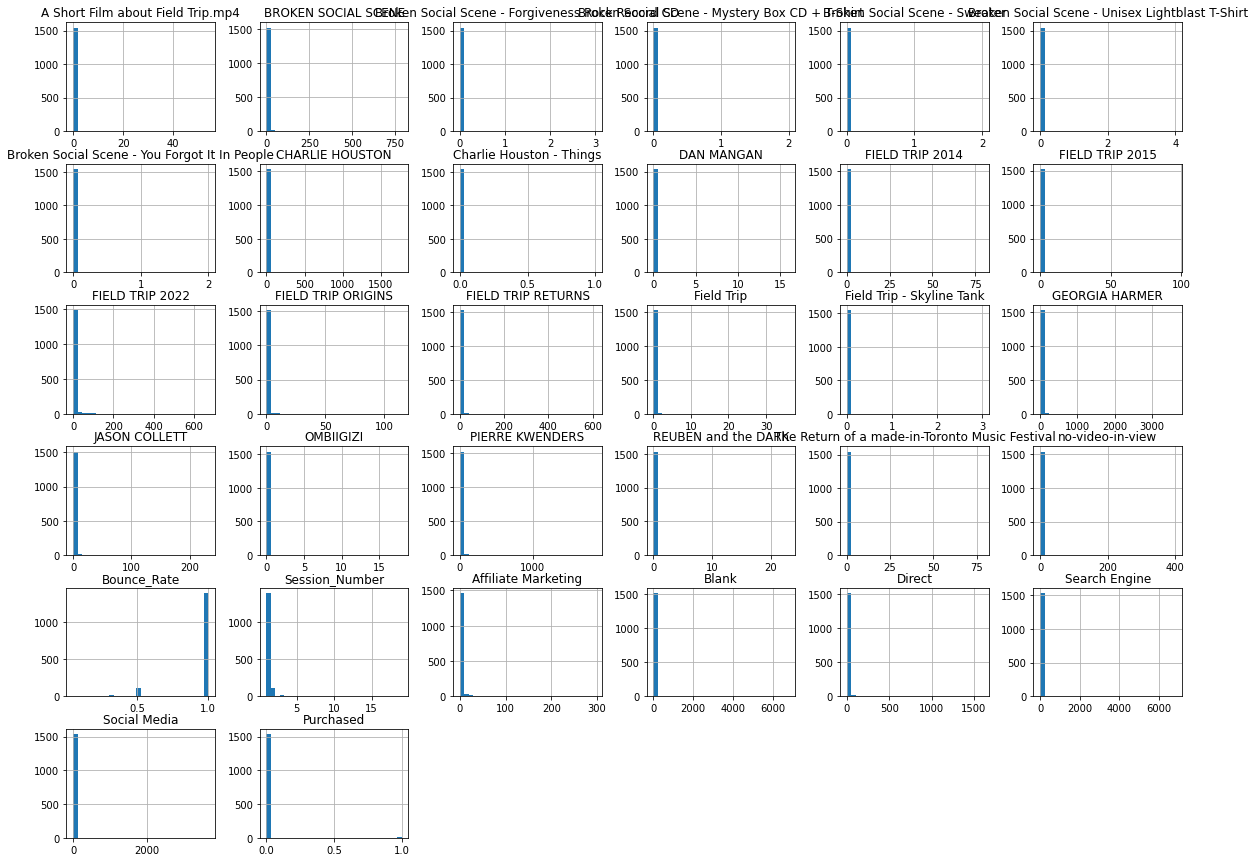

In [ ]:
df1.hist(bins=30, figsize=(20, 15)) # histogram

In [ ]:
# EMILIO

### Flow of Analysis <br>
<img src = 'https://drive.google.com/uc?id=1NyPBncONbo5-Hq5XMW1KBD-KVQeCDAav'>

# Main Split dataset (70:30)

In [ ]:
# focus only on observations that purchased

In [ ]:
y = df_merch1[['Item_Purchased']]
X = pd.DataFrame(df_merch1.iloc[: , 1:-1])

In [ ]:
print('yshape:', y.shape)
print('xshape:', X.shape)

yshape: (9, 1)
xshape: (9, 31)


In [ ]:
y.head()

,Item_Purchased
18,Field Trip - Skyline Snapback Hat
119,Broken Social Scene - You Forgot It In People
728,Pierre Kwenders - José Louis and the Paradox o...
753,Broken Social Scene - This Book Is Broken
776,Georgia Harmer - Austin


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 18 to 1159
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   A Short Film about Field Trip.mp4                 9 non-null      float64
 1   BROKEN SOCIAL SCENE                               9 non-null      float64
 2   Broken Social Scene - Forgiveness Rock Record CD  9 non-null      float64
 3   Broken Social Scene - Mystery Box CD + T-Shirt    9 non-null      float64
 4   Broken Social Scene - Sweater                     9 non-null      float64
 5   Broken Social Scene - Unisex Lightblast T-Shirt   9 non-null      float64
 6   Broken Social Scene - You Forgot It In People     9 non-null      float64
 7   CHARLIE HOUSTON                                   9 non-null      float64
 8   Charlie Houston - Things                          9 non-null      float64
 9   DAN MANGAN           

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105) # 70:30 split

# Baseline model (Random Forest)

###Normalize Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler. transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Train the random forest model
rf_model = RandomForestClassifier() # default hyperparameter
baseline_model = rf_model.fit(X_train_sc, y_train)
baseline_prediction = baseline_model.predict(X_test_sc)

# Check the model performance
print(classification_report(y_test, baseline_prediction))

                                                      precision    recall  f1-score   support

         Arts & Crafts Logo T-Shirt (Unisex) - White       0.00      0.00      0.00       0.0
           Broken Social Scene - This Book Is Broken       0.00      0.00      0.00       1.0
       Broken Social Scene - You Forgot It In People       0.00      0.00      0.00       0.0
                             Georgia Harmer - Austin       0.00      0.00      0.00       0.0
Pierre Kwenders - José Louis and the Paradox of Love       0.00      0.00      0.00       2.0

                                            accuracy                           0.00       3.0
                                           macro avg       0.00      0.00      0.00       3.0
                                        weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undef

### Flow of Analysis <br>
<img src = 'https://drive.google.com/uc?id=1NyPBncONbo5-Hq5XMW1KBD-KVQeCDAav'>

# Balance using SMOTE
(chosen technique is based on DANA result)

In [ ]:
#assign x and y using the clean dataset
y1 = df1['Purchased']
X1 = pd.DataFrame(df1.iloc[: , 1:-1])

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   A Short Film about Field Trip.mp4                 1545 non-null   float64 
 1   BROKEN SOCIAL SCENE                               1545 non-null   float64 
 2   Broken Social Scene - Forgiveness Rock Record CD  1545 non-null   float64 
 3   Broken Social Scene - Mystery Box CD + T-Shirt    1545 non-null   float64 
 4   Broken Social Scene - Sweater                     1545 non-null   float64 
 5   Broken Social Scene - Unisex Lightblast T-Shirt   1545 non-null   float64 
 6   Broken Social Scene - You Forgot It In People     1545 non-null   float64 
 7   CHARLIE HOUSTON                                   1545 non-null   float64 
 8   Charlie Houston - Things                          1545 non-null   float64 
 9   DAN MANG

In [ ]:
# CONVERT CATEGORICAL VARIABLE TO NUMERICAL
cat_columns = X1.select_dtypes(['category']).columns
X1[cat_columns] = X1[cat_columns].apply(lambda x: x.cat.codes) # AS FACTOR CONVERSION

smote = SMOTE(random_state=42)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X1, y1)

print('Original dataset shape', Counter(y1))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1536, 1: 9})
Resample dataset shape Counter({0: 1536, 1: 1536})


In [ ]:
# #another way to make sample using smote for datasets containing numerical and categorical features

# cat_columns = X1.select_dtypes(['category']).columns
# X1[cat_columns] = X1[cat_columns].apply(lambda x: x.cat.codes)

# from imblearn.over_sampling import SMOTENC
# smote2 = SMOTENC(random_state=42, categorical_features=[31])
# # fit predictor and target variable
# x_smote2, y_smote2 = smote2.fit_resample(X1, y1)

# print('Original dataset shape', Counter(y1))
# print('Resample dataset shape', Counter(y_smote))

### SPLIT DATASET FOR CLASSIFICATION (USE ONLY THE PURCHASED =1 DATASET

In [ ]:
#merge the x_smote and y_smote to create a new dataset
df_smote = x_smote.join(y_smote)

#Create a new dataset that pertains only to purchased =1
df_smote1 = df_smote[df_smote['Purchased'] == 1] 

In [ ]:
#CONVERT ITEM PURCHASED to categorical variable to save as list (for recommendation later)
df_smote1['Item_Purchased'] = df_smote1['Item_Purchased'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Store the labels to a list
labels = df_merch1['Item_Purchased'].tolist()
pd.DataFrame(labels, columns=['Labels']) # to view it properly

,Labels
0,Field Trip - Skyline Snapback Hat
1,Broken Social Scene - You Forgot It In People
2,Pierre Kwenders - José Louis and the Paradox o...
3,Broken Social Scene - This Book Is Broken
4,Georgia Harmer - Austin
5,Pierre Kwenders - Heartbeat
6,Arts & Crafts Logo T-Shirt (Unisex) - White
7,Pierre Kwenders - José Louis and the Paradox o...
8,Broken Social Scene - You Forgot It In People


In [ ]:
# get x and y from the data with purchase=1
y = df_smote1['Item_Purchased']
X = pd.DataFrame(df_smote1.iloc[: , 0:-2])

In [ ]:
X.shape

(1536, 31)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 18 to 3071
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   A Short Film about Field Trip.mp4                 1536 non-null   float64
 1   BROKEN SOCIAL SCENE                               1536 non-null   float64
 2   Broken Social Scene - Forgiveness Rock Record CD  1536 non-null   float64
 3   Broken Social Scene - Mystery Box CD + T-Shirt    1536 non-null   float64
 4   Broken Social Scene - Sweater                     1536 non-null   float64
 5   Broken Social Scene - Unisex Lightblast T-Shirt   1536 non-null   float64
 6   Broken Social Scene - You Forgot It In People     1536 non-null   float64
 7   CHARLIE HOUSTON                                   1536 non-null   float64
 8   Charlie Houston - Things                          1536 non-null   float64
 9   DAN MANGAN        

##Split Dataset (70:30)
*based on purchased observations*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=105) # review splitting

In [ ]:
X_train.shape

(1075, 31)

In [ ]:
X_test.shape

(461, 31)

In [ ]:
y_train.shape

(1075,)

In [ ]:
y_test.shape

(461,)

##Normalize Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler. transform(X_train)
X_test_sc = scaler.transform(X_test)

# Classify merchandise group 
(using sub-train dataset and check accuracy on sub-test dataset)

### Flow of Analysis <br>
<img src = 'https://drive.google.com/uc?id=1NyPBncONbo5-Hq5XMW1KBD-KVQeCDAav'>

In [ ]:
# STEVEN

### 1. Random Forest

In [ ]:
# Train the random forest model

#create the model
rf_model = RandomForestClassifier()

baseline_model = rf_model.fit(X_train_sc, y_train)
baseline_prediction = baseline_model.predict(X_test_sc)

# Check the model performance
print(classification_report(y_test, baseline_prediction))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       1.00      0.97      0.98        94
           3       0.96      0.97      0.97       111
           4       0.90      0.96      0.93        55
           5       0.90      0.92      0.91        66
           6       0.97      0.90      0.93        70
           7       0.60      0.60      0.60        10

    accuracy                           0.95       461
   macro avg       0.90      0.90      0.90       461
weighted avg       0.95      0.95      0.95       461



In [ ]:
from sklearn import metrics
print('Accuracy:', round(metrics.accuracy_score(y_test, baseline_prediction),4))

Accuracy: 0.9479


Text(0.5, 1.0, 'Confusion Matrix')

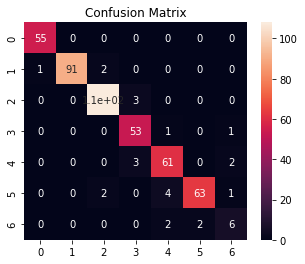

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, baseline_prediction)
cm_df = pd.DataFrame(cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')

### 2. Logistic Regression CV (multinom)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

#create the model
log_reg_model = LogisticRegressionCV(solver='sag', penalty="l2", max_iter=100, cv=2, multi_class='multinomial') #with ridge penalty and cross validation

#fit the model
log_reg_model.fit(X_train_sc,y_train)

#Predict the model
predict_y_log = log_reg_model.predict(X_test_sc)

# Check the model performance
print(classification_report(y_test, predict_y_log))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

              precision    recall  f1-score   support

           1       0.92      0.80      0.85        55
           2       0.68      0.79      0.73        94
           3       0.73      0.86      0.79       111
           4       0.62      0.24      0.34        55
           5       0.52      0.56      0.54        66
           6       0.74      0.80      0.77        70
           7       0.50      0.20      0.29        10

    accuracy                           0.70       461
   macro avg       0.67      0.61      0.62       461
weighted avg       0.69      0.70      0.68       461



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Text(0.5, 1.0, 'Confusion Matrix')

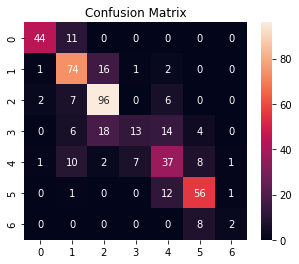

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_y_log)
cm_df = pd.DataFrame(cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')

In [ ]:
# DONNA

### 3. XGBoost

In [ ]:
LR = 0.1
MD = 5
alpha = 10
n_est = 100

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRFClassifier(colsample_bytree = 0.3, learning_rate = LR, max_depth = MD, alpha = alpha, n_estimators = n_est) 

#FIT THE MODEL
xgb.fit(X_train_sc, y_train)

#PREDICT
predict_y_xgb =xgb.predict(X_test_sc)
# Check the model performance

print(classification_report(y_test, predict_y_xgb))

              precision    recall  f1-score   support

           1       0.89      0.91      0.90        55
           2       0.85      0.94      0.89        94
           3       0.87      0.91      0.89       111
           4       0.82      0.73      0.77        55
           5       0.82      0.89      0.86        66
           6       0.92      0.77      0.84        70
           7       0.80      0.40      0.53        10

    accuracy                           0.86       461
   macro avg       0.85      0.79      0.81       461
weighted avg       0.86      0.86      0.86       461



Text(0.5, 1.0, 'Confusion Matrix')

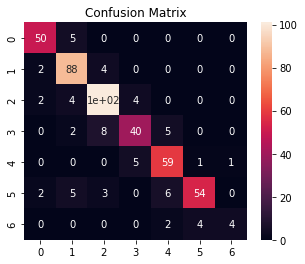

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_y_xgb)
cm_df = pd.DataFrame(cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')

### 4. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#create the model 
rfc = RandomForestClassifier(n_estimators=n_est)
#adaboost classifer object
ada1 = AdaBoostClassifier(n_estimators=n_est, base_estimator=rfc, learning_rate=LR)

# fit the model
rfc_ada = ada1.fit(X_train_sc, y_train)

#Predict the response for test dataset
predict_y_ada = rfc_ada.predict(X_test_sc)

print(classification_report(y_test, predict_y_ada))



              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       0.97      0.97      0.97        94
           3       0.96      0.96      0.96       111
           4       0.88      0.95      0.91        55
           5       0.88      0.91      0.90        66
           6       0.97      0.86      0.91        70
           7       0.55      0.60      0.57        10

    accuracy                           0.93       461
   macro avg       0.88      0.89      0.89       461
weighted avg       0.94      0.93      0.94       461



In [ ]:
#conf_mat_norm= np.around(a.astype('float') / a.sum(axis=1)[:, np.newaxis], decimals=2)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predict_y_ada)

0.9349240780911063

Text(0.5, 1.0, 'Confusion Matrix')

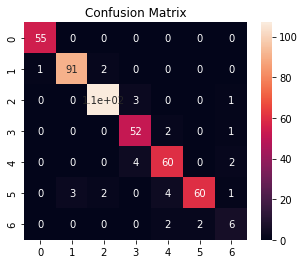

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_y_ada)
cm_df = pd.DataFrame(cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')

In [ ]:
# JOMBEE


### 5. Bayesian Guassian Mixture

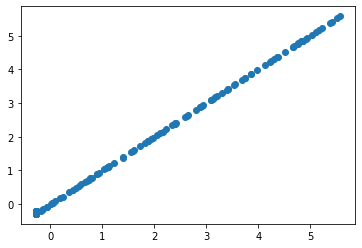

In [ ]:
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], cmap='viridis') #to check data distribution/relationship

In [ ]:
#perform the classification
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=13, random_state=42, n_init=10, covariance_type="full") 
bgm_model = bgm.fit(X_train_sc) #fit the model
#n_components >number of mixture components (13 is the optimal)
#n_init = default1 > number of initializations to perform (lower bound value is kept)
#method to initialize the weight is Kmeans(default) 
#covariance type > constrains the shape of the cluster such that all dimensions are equal. (diagonal/tied/spherical type gave very low accuracy)

In [ ]:
bgm_weights = bgm_model.weights_ #weights - all positive
np.round(bgm_weights, 2) 
#components with weight close to zero contribute very less to the mixture and can be neglected. 
#Components with weights close to unity are very important.There's proper probability distribution.

array([0.18, 0.36, 0.02, 0.05, 0.01, 0.07, 0.01, 0.01, 0.02, 0.23, 0.01,
       0.01, 0.01])

In [ ]:
n_clusters_ = (np.round(bgm_weights, 2) > 0).sum() #predefined - 13 is the optimal
print('Estimated number of clusters: ' + str(n_clusters_))

Estimated number of clusters: 13


In [ ]:
bgm_mean = bgm_model.means_
np.round(bgm_mean, 2) 
#The mean of each mixture component.(n_components, n_features)

array([[-0.28, -0.29,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.36,  0.  ,
        -0.32, -0.28, -0.28, -0.3 , -0.28, -0.16, -0.28,  0.  , -0.28,
        -0.38, -0.42, -0.33,  0.83,  0.  , -0.17,  0.55, -0.4 , -0.27,
        -0.37, -0.34, -0.32,  0.  ],
       [-0.28, -0.26,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.36,  0.  ,
        -0.32, -0.28, -0.28, -0.3 , -0.28, -0.38, -0.28,  0.  , -0.29,
        -0.38, -0.42, -0.31, -0.05,  0.  , -0.28,  0.55, -0.4 , -0.27,
        -0.37, -0.34, -0.56,  0.  ],
       [ 2.82,  2.82,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.61,  0.  ,
        -0.31,  2.82,  2.82,  2.83,  2.82,  2.76,  2.82,  0.  ,  2.81,
         2.48,  1.77,  2.83, -0.24,  0.  ,  2.71, -1.75,  2.22,  2.77,
         2.46,  2.76,  1.71,  0.  ],
       [-0.27, -0.29,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.16,  0.  ,
         1.48, -0.27, -0.27, -0.26, -0.27, -0.3 , -0.27,  0.  , -0.24,
         0.31,  0.85, -0.23, -0.5 ,  0.  , -0.07, -0.67,  0.47, -0.27,
         0.36, -0.07, -0.73,  0.  ],


In [ ]:
bgm_pred = bgm_model.predict(X_test_sc) #predict labels in X using the model

In [ ]:
bgm_prob = bgm_model.predict_proba(X_test_sc) #predict probabilities in X using the model
print(bgm_prob[:5].round(3))

[[0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.   ]
 [0.    0.    0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.999
  0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
  0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.   ]
 [0.998 0.002 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.   ]]


In [ ]:
# Check the model performance
print(classification_report(y_test, bgm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.15      0.47      0.23        55
           2       0.00      0.00      0.00        94
           3       0.10      0.03      0.04       111
           4       0.00      0.00      0.00        55
           5       0.38      0.23      0.28        66
           6       0.00      0.00      0.00        70
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

    accuracy                           0.10       461
   macro avg       0.05      0.06      0.04       461
weighted avg       0.10      0.10      0.08       461



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#profiling/attach mean as row to original dataset
column_names = list(X.columns.values)
df_bgm = pd.DataFrame(bgm_mean, columns=column_names).append(X,ignore_index=True)
df_bgm.head(2)

,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,DAN MANGAN,...,REUBEN and the DARK,The Return of a made-in-Toronto Music Festival,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media
0,-0.276171,-0.289476,0.0,0.0,0.0,0.0,0.0,-0.361369,0.0,-0.323415,...,0.829954,0.0,-0.174237,0.545458,-0.399781,-0.272458,-0.368537,-0.339281,-0.317112,0.0
1,-0.276878,-0.264543,0.0,0.0,0.0,0.0,0.0,-0.362310,0.0,-0.324260,...,-0.051430,0.0,-0.284694,0.547309,-0.400805,-0.273156,-0.369342,-0.340189,-0.560600,0.0


In [ ]:
#subset first row and transpose (from highest to lowest) - CLUSTER1 
df_bgm1 = df_bgm.iloc[0, :]
a = df_bgm1.T
a = pd.DataFrame(a)
a.sort_values (0, ascending = False)


,0
REUBEN and the DARK,0.829954
Bounce_Rate,0.545458
Social Media,0.000000
Broken Social Scene - Forgiveness Rock Record CD,0.000000
Broken Social Scene - Mystery Box CD + T-Shirt,0.000000
Broken Social Scene - Sweater,0.000000
Broken Social Scene - Unisex Lightblast T-Shirt,0.000000
Broken Social Scene - You Forgot It In People,0.000000
Charlie Houston - Things,0.000000
The Return of a made-in-Toronto Music Festival,0.000000


In [ ]:
#subset first row and transpose (from highest to lowest) - CLUSTER 2
df_bgm2 = df_bgm.iloc[1, :]
b = df_bgm2.T
b = pd.DataFrame(b)
b.sort_values (1, ascending = False)

,1
Bounce_Rate,0.547309
Social Media,0.000000
Broken Social Scene - Forgiveness Rock Record CD,0.000000
Broken Social Scene - Mystery Box CD + T-Shirt,0.000000
Broken Social Scene - Sweater,0.000000
Broken Social Scene - Unisex Lightblast T-Shirt,0.000000
Broken Social Scene - You Forgot It In People,0.000000
Charlie Houston - Things,0.000000
The Return of a made-in-Toronto Music Festival,0.000000
Field Trip - Skyline Tank,0.000000


In [ ]:
# DONNA

### Flow of Analysis <br>
<img src = 'https://drive.google.com/uc?id=1NyPBncONbo5-Hq5XMW1KBD-KVQeCDAav'>

# Predict on main-test dataset
(use best algorithm)

In [ ]:
#df_merch0 is the not purchased dataset

X_Maintest= pd.DataFrame(df_merch0.iloc[: , 1:-1])
X_Maintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 0 to 1544
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   A Short Film about Field Trip.mp4                 1536 non-null   float64
 1   BROKEN SOCIAL SCENE                               1536 non-null   float64
 2   Broken Social Scene - Forgiveness Rock Record CD  1536 non-null   float64
 3   Broken Social Scene - Mystery Box CD + T-Shirt    1536 non-null   float64
 4   Broken Social Scene - Sweater                     1536 non-null   float64
 5   Broken Social Scene - Unisex Lightblast T-Shirt   1536 non-null   float64
 6   Broken Social Scene - You Forgot It In People     1536 non-null   float64
 7   CHARLIE HOUSTON                                   1536 non-null   float64
 8   Charlie Houston - Things                          1536 non-null   float64
 9   DAN MANGAN         

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 18 to 3071
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   A Short Film about Field Trip.mp4                 1536 non-null   float64
 1   BROKEN SOCIAL SCENE                               1536 non-null   float64
 2   Broken Social Scene - Forgiveness Rock Record CD  1536 non-null   float64
 3   Broken Social Scene - Mystery Box CD + T-Shirt    1536 non-null   float64
 4   Broken Social Scene - Sweater                     1536 non-null   float64
 5   Broken Social Scene - Unisex Lightblast T-Shirt   1536 non-null   float64
 6   Broken Social Scene - You Forgot It In People     1536 non-null   float64
 7   CHARLIE HOUSTON                                   1536 non-null   float64
 8   Charlie Houston - Things                          1536 non-null   float64
 9   DAN MANGAN        

In [ ]:
#create the model 

#Predict the response for main test dataset
predict_y_ada = rfc_ada.predict(X_Maintest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#create the model 

#Predict the response for main test dataset
predict_y_rf= baseline_model.predict(X_Maintest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
df_merch0_copy = df_merch0
df_merch0_copy['Reco_Product'] = predict_y_ada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_merch0_copy1 = df_merch0
df_merch0_copy1['Reco_Product'] = predict_y_rf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_merch0_copy['Reco_Product'].astype('category')
df_merch0_copy['Reco_Product'].unique()

array([1, 6, 3, 7])

In [ ]:
labels

['Field Trip - Skyline Snapback Hat',
 'Broken Social Scene - You Forgot It In People',
 'Pierre Kwenders - José Louis and the Paradox of Love',
 'Broken Social Scene - This Book Is Broken',
 'Georgia Harmer - Austin',
 'Pierre Kwenders - Heartbeat',
 'Arts & Crafts Logo T-Shirt (Unisex) - White',
 'Pierre Kwenders - José Louis and the Paradox of Love',
 'Broken Social Scene - You Forgot It In People']

In [ ]:
df_merch0_copy['Reco_Product'].replace({
 0:'Field Trip - Skyline Snapback Hat',
 1:'Broken Social Scene - You Forgot It In People',
 2:'Pierre Kwenders - José Louis and the Paradox of Love',
 3:'Broken Social Scene - This Book Is Broken',
 4:'Georgia Harmer - Austin',
 5:'Pierre Kwenders - Heartbeat',
 6:'Arts & Crafts Logo T-Shirt (Unisex) - White',
 7:'Pierre Kwenders - José Louis and the Paradox of Love',
 8:'Broken Social Scene - You Forgot It In People'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_merch0_copy1['Reco_Product'].replace({
 0:'Field Trip - Skyline Snapback Hat',
 1:'Broken Social Scene - You Forgot It In People',
 2:'Pierre Kwenders - José Louis and the Paradox of Love',
 3:'Broken Social Scene - This Book Is Broken',
 4:'Georgia Harmer - Austin',
 5:'Pierre Kwenders - Heartbeat',
 6:'Arts & Crafts Logo T-Shirt (Unisex) - White',
 7:'Pierre Kwenders - José Louis and the Paradox of Love',
 8:'Broken Social Scene - You Forgot It In People'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_merch0_copy['Reco_Product'].unique()

array(['Broken Social Scene - You Forgot It In People',
       'Arts & Crafts Logo T-Shirt (Unisex) - White',
       'Broken Social Scene - This Book Is Broken',
       'Pierre Kwenders - José Louis and the Paradox of Love'],
      dtype=object)

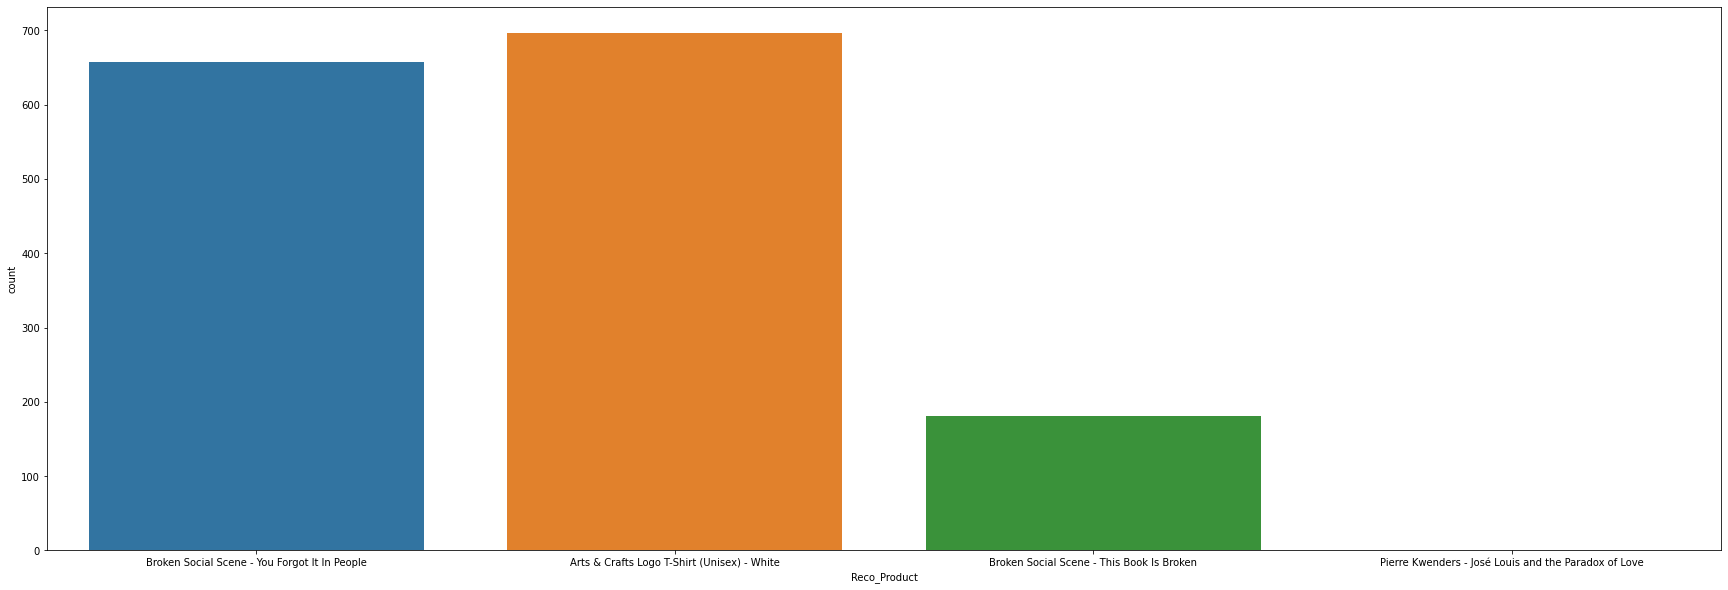

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='Reco_Product',data=df_merch0_copy1)

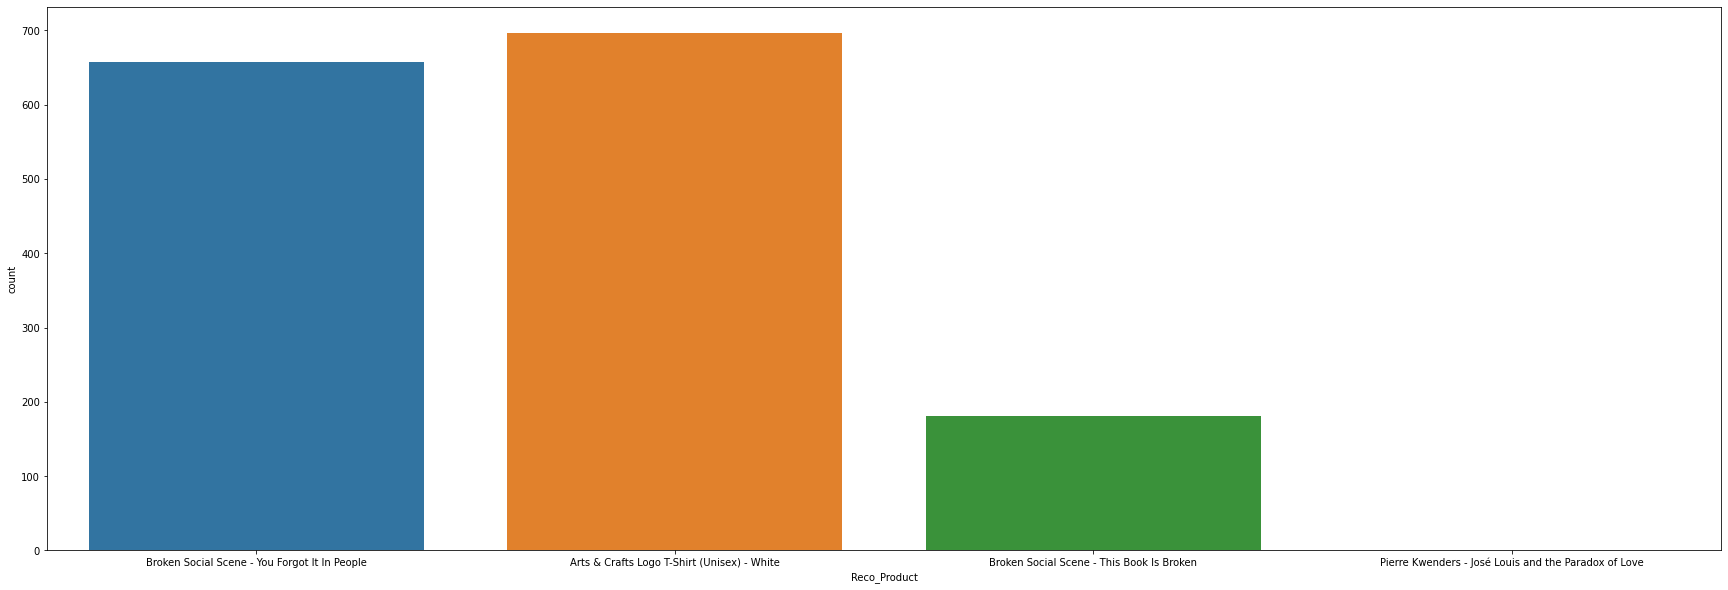

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x='Reco_Product',data=df_merch0_copy)

In [ ]:
df_merch0_copy.head()

,anonymousId,A Short Film about Field Trip.mp4,BROKEN SOCIAL SCENE,Broken Social Scene - Forgiveness Rock Record CD,Broken Social Scene - Mystery Box CD + T-Shirt,Broken Social Scene - Sweater,Broken Social Scene - Unisex Lightblast T-Shirt,Broken Social Scene - You Forgot It In People,CHARLIE HOUSTON,Charlie Houston - Things,...,no-video-in-view,Bounce_Rate,Session_Number,Affiliate Marketing,Blank,Direct,Search Engine,Social Media,Item_Purchased,Reco_Product
0,0025fb46-562d-4356-bd7f-8d676d068768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,48,0,Broken Social Scene - You Forgot It In People
1,00593f96-1168-44c8-857d-7e1c496979bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,26,0,Broken Social Scene - You Forgot It In People
2,0099e8f2-c8ac-49dc-800d-910026488ac2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1,0,0,0,0,100,0,Broken Social Scene - You Forgot It In People
3,013d5ff7-4d34-447d-a7e3-995bae82d7d1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,22,0,0,Arts & Crafts Logo T-Shirt (Unisex) - White
4,0148af27-acb6-46b7-8844-27939dc26646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,0,0,12,0,Broken Social Scene - You Forgot It In People


#SUMMARY

**Imbalance Dataset**
1. Random Forest
  Accuracy: 0%
  Precision: 0%
  Recall: 0%

**Balance Dataset**
1. Random Forest
  Accuracy: 95%
  Precision: 95%
  Recall: 95%

2. Logistic Regression
  Accuracy: 70%
  Precision: 69%
  Recall: 70%

3. Random Forest - XGBoost
  Accuracy: 86%
  Precision: 86%
  Recall: 86%

3. Random Forest - ADA
  Accuracy: 93%
  Precision: 94%
  Recall: 93%

In [ ]:
# EMILIO

#CONCLUSION




*   Based on the result of Random Forest in a balanced dataset performs the best among all other models. However, it usually changes after numerous attempts, it is between Random Forest and Random Forest with Adaboost that gives the best accuracy. The accuracy of the two models are don't vary that far after the dataset is balance using SMOTE.However, It is recommended to run again the model if the data is updated so that more products and videos can be considered in the attributes.



*   The result shows that the majority of the products recommended are attributable  product Arts and Crafts Logo Tshirt and music Broken Social Scene, You forgot it in peo, followed by 





#RECOMMENDATION




*   As part of the project improvement, it is better to also consider the time as the music and products is constantly changing on a per weekly, monthly and yearly basis


*   To better improve the model, it is best to have an updated data as the info on shopping to cart is insuffient as a training set. Another thing also, most user id records do not matched with the user id in the web data.


